In [3]:
import csv
import numpy
import pandas as pd;
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(r'prices-split-adjusted.csv')
df.apply(lambda x: sum(x.isnull()), axis=0)   # Checking for null values

date      0
symbol    0
open      1
close     1
low       1
high      1
volume    1
dtype: int64

In [5]:
symbol = df.symbol.unique()
execute = True
while execute:
    sym = input('Enter symbol of share?')         #Input stock name from user
    if sym in symbol:
        execute = False
    else:
        print("Enter a valid share symbol") 

Enter symbol of share?EA


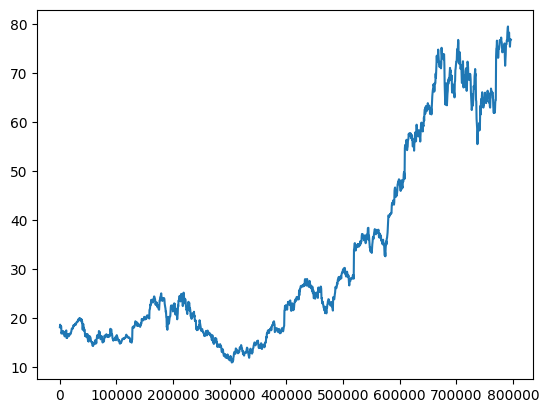

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
df1 = df[df.symbol.apply(lambda x:x==sym)] # Retrieving data of that particular share
plt.plot(df1.index,df1.close)

In [7]:
df2 = df1.loc[:,'open':] # Considering important columns
df2.head()

,open,close,low,high,volume
388,17.990000,18.150000,17.889999,18.240000,3850500.0
856,18.309999,18.660000,18.230000,18.870001,6632500.0
1324,18.610001,18.180000,18.059999,18.650000,5047300.0
1792,17.910000,18.040001,17.780001,18.070000,5433200.0
2260,18.180000,18.400000,18.030001,18.450001,4055600.0


In [8]:
days = 22                            # Creating features based on last 22 days of data
df3 = pd.DataFrame()
rows = df2.shape[0]
for i in range(1,rows-days):
    s = pd.Series()
    for j in range(i,i+days):
        s = s.append(df2.iloc[j,:])
    df4 = pd.DataFrame(s)
    df3 = df3.append(df4.transpose())
df3.head() 
df3 = df3.reset_index(drop=True)
df3.shape

(1629, 110)

In [9]:
y = pd.DataFrame()
y = df2.close[days+1:]
y = y.transpose()
y = y.reset_index(drop=True)
y.head()   

0    17.260000
1    17.490000
2    15.960000
3    15.940000
4    16.120001
Name: close, dtype: float64

In [11]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.LinearRegression(copy_X=True)         #  Using Linear Regression model
test_days = 30
train = df3.shape[0]-test_days
x_train = df3.iloc[0:train]            # Dividng training and tesing data
x_train.head() 

,open,close,low,high,volume,open,close,low,high,volume,...,open,close,low,high,volume,open,close,low,high,volume
0,18.309999,18.660000,18.230000,18.870001,6632500.0,18.610001,18.180000,18.059999,18.650000,5047300.0,...,16.920000,17.27,16.790001,17.320000,6417200.0,17.180000,16.98,16.82,17.180000,7194600.0
1,18.610001,18.180000,18.059999,18.650000,5047300.0,17.910000,18.040001,17.780001,18.070000,5433200.0,...,17.180000,16.98,16.820000,17.180000,7194600.0,16.850000,17.26,16.83,17.330000,10278500.0
2,17.910000,18.040001,17.780001,18.070000,5433200.0,18.180000,18.400000,18.030001,18.450001,4055600.0,...,16.850000,17.26,16.830000,17.330000,10278500.0,17.379999,17.49,17.01,17.860001,16170700.0
3,18.180000,18.400000,18.030001,18.450001,4055600.0,18.469999,18.270000,18.129999,18.700001,6142400.0,...,17.379999,17.49,17.010000,17.860001,16170700.0,16.040001,15.96,15.70,16.280001,47398100.0
4,18.469999,18.270000,18.129999,18.700001,6142400.0,16.740000,16.850000,16.559999,17.139999,31920900.0,...,16.040001,15.96,15.700000,16.280001,47398100.0,16.040001,15.94,15.75,16.120001,13675500.0


In [12]:
y_train = y.iloc[0:train]
model.fit(x_train, y_train) # Fitting Linear Model

LinearRegression()

In [13]:
x_test = df3.iloc[train+1:]
y_test = pd.Series(model.predict(x_test))     # Predicting the Linear Model
y_actual = y.iloc[train+1:]
mean_squared_error(y_test,y_actual) #Mean Squared Error of Test Data

1.1044935655410195

In [14]:
[y_test] # Model Predicted Values

[0     75.143326
 1     74.614035
 2     75.293677
 3     74.311875
 4     74.968512
 5     76.133642
 6     75.344601
 7     76.051928
 8     73.439514
 9     71.857414
 10    73.554163
 11    73.813265
 12    75.718087
 13    75.661155
 14    75.977165
 15    76.650994
 16    76.565261
 17    79.270832
 18    79.363293
 19    79.148901
 20    78.002206
 21    78.288040
 22    77.458030
 23    77.875414
 24    76.505913
 25    76.483293
 26    75.617236
 27    76.406982
 28    77.371845
 dtype: float64]

In [15]:
y_actual=y_actual.reset_index(drop=True)
y_test= y_test.reset_index(drop=True)
y_actual.head()

0    74.389999
1    75.000000
2    74.519997
3    75.309998
4    75.510002
Name: close, dtype: float64

In [16]:
y_test.head() 

0    75.143326
1    74.614035
2    75.293677
3    74.311875
4    74.968512
dtype: float64

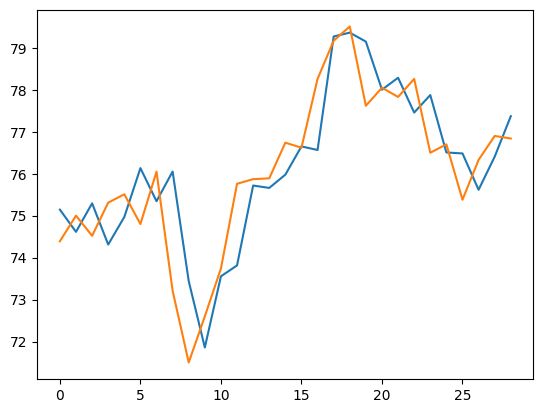

In [17]:
plt.plot(y_test)          # Comparing test predictions with actual data
plt.plot(y_actual)        # Blue - y_test and Orange - y_actual

In [18]:
r2_score(y_test,y_actual) #r2 score of model

0.6523916297507604

In [19]:
y_train_test = pd.Series(model.predict(x_train))
mean_squared_error(y_train,y_train_test)          #Mean Squared Error of Training Data


0.5106924377456319

In [20]:
r2_score(y_train,y_train_test)                   #r2_score of Training Data

0.9986657006710616

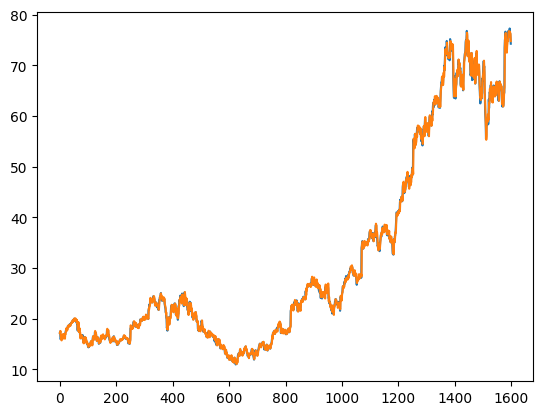

In [21]:
y_train = y_train.reset_index(drop=True)
y_train_test = y_train_test.reset_index(drop=True)
plt.plot(y_train)
plt.plot(y_train_test)            #Visualization of Predictions vs Actual Data

In [22]:
x_train_squared = x_train**2           # Making the training features squared for Ploynomial Regression 
x_poly_train = pd.concat([x_train, x_train_squared], axis=1)
x_poly_train = x_poly_train.reset_index(drop=True)
x_poly_train.head() # Features for polynomial regression model

,open,close,low,high,volume,open,close,low,high,volume,...,open,close,low,high,volume,open,close,low,high,volume
0,18.309999,18.660000,18.230000,18.870001,6632500.0,18.610001,18.180000,18.059999,18.650000,5047300.0,...,286.286400,298.2529,281.904134,299.982400,4.118046e+13,295.152400,288.3204,282.9124,295.152400,5.176227e+13
1,18.610001,18.180000,18.059999,18.650000,5047300.0,17.910000,18.040001,17.780001,18.070000,5433200.0,...,295.152400,288.3204,282.912400,295.152400,5.176227e+13,283.922500,297.9076,283.2489,300.328900,1.056476e+14
2,17.910000,18.040001,17.780001,18.070000,5433200.0,18.180000,18.400000,18.030001,18.450001,4055600.0,...,283.922500,297.9076,283.248900,300.328900,1.056476e+14,302.064365,305.9001,289.3401,318.979636,2.614915e+14
3,18.180000,18.400000,18.030001,18.450001,4055600.0,18.469999,18.270000,18.129999,18.700001,6142400.0,...,302.064365,305.9001,289.340100,318.979636,2.614915e+14,257.281632,254.7216,246.4900,265.038433,2.246580e+15
4,18.469999,18.270000,18.129999,18.700001,6142400.0,16.740000,16.850000,16.559999,17.139999,31920900.0,...,257.281632,254.7216,246.490000,265.038433,2.246580e+15,257.281632,254.0836,248.0625,259.854432,1.870193e+14


In [23]:
x_test_squared = x_test**2          # Making the test features squared for Ploynomial Regression
x_poly_test = pd.concat([x_test, x_test_squared], axis=1)
x_poly_test = x_poly_test.reset_index(drop=True)
x_poly_test.head() 

,open,close,low,high,volume,open,close,low,high,volume,...,open,close,low,high,volume,open,close,low,high,volume
0,74.730003,75.199997,74.660004,76.089996,4189100.0,75.070000,76.620003,74.809998,77.150002,4329200.0,...,5608.511950,5511.577303,5446.440443,5689.684900,1.354461e+13,5496.739452,5553.229953,5380.222207,5592.048250,4.068289e+12
1,75.070000,76.620003,74.809998,77.150002,4329200.0,75.720001,75.139999,74.529999,76.599998,5105100.0,...,5496.739452,5553.229953,5380.222207,5592.048250,4.068289e+12,5559.193302,5533.871951,5481.921748,5659.553351,5.807618e+12
2,75.720001,75.139999,74.529999,76.599998,5105100.0,74.699997,74.489998,73.260002,74.870003,4432500.0,...,5559.193302,5533.871951,5481.921748,5659.553351,5.807618e+12,5474.519804,5625.000000,5412.544900,5637.006700,8.230013e+12
3,74.699997,74.489998,73.260002,74.870003,4432500.0,74.220001,73.500000,72.940002,74.220001,3236700.0,...,5474.519804,5625.000000,5412.544900,5637.006700,8.230013e+12,5649.026201,5553.229953,5414.016694,5649.026201,1.781346e+13
4,74.220001,73.500000,72.940002,74.220001,3236700.0,73.480003,73.110001,72.930000,74.010002,3772500.0,...,5649.026201,5553.229953,5414.016694,5649.026201,1.781346e+13,5578.596399,5671.595799,5493.774845,5827.794989,8.688346e+12


In [25]:
poly_model = linear_model.LinearRegression(copy_X=True)  
poly_model.fit(x_poly_train, y_train)                # Fitting a Polynomial Regression Model with Squared Features

LinearRegression()

In [26]:
y_poly_predict = pd.Series(poly_model.predict(x_poly_test))
mean_squared_error(y_poly_predict,y_actual) #Mean Squared Error of Polynomial Regression Model

1.2403784949949073

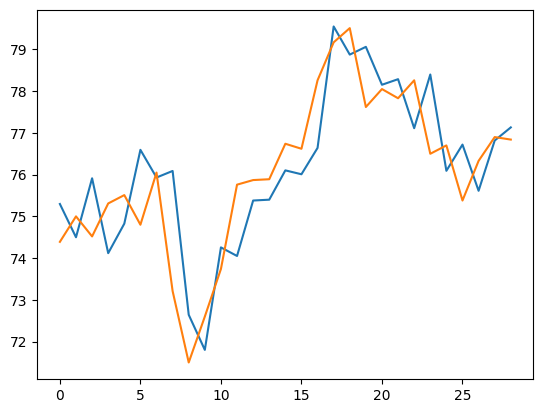

In [27]:
plt.plot(y_poly_predict)      #Comparing test predictions with actual data 
plt.plot(y_actual)            # Blue - y_test and Orange - y_actual

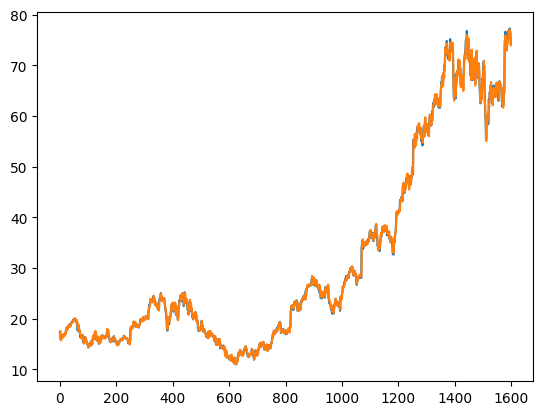

In [28]:
y_poly_train_predict = poly_model.predict(x_poly_train)
plt.plot(y_train)
plt.plot(y_poly_train_predict) # Overfitting visualization